<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/class-activities/Class_Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold

In [47]:
import random
## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [48]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [49]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color)

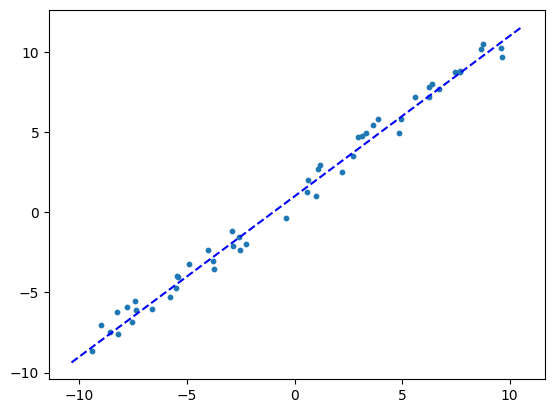

In [50]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [51]:
def regularized_linear_regression(X, Y, lambd):
    """Return weights from regularized linear regression."""
    XtX = np.matmul(np.transpose(X), X)
    regularization_term = lambd * np.eye(XtX.shape[0])
    XtX += regularization_term
    XtX_inv = np.linalg.inv(XtX)
    X_pi = np.matmul(XtX_inv, np.transpose(X))
    w = np.matmul(X_pi, Y)
    return w

def mse(Y_true, Y_pred):
    """Calculate Mean Squared Error."""
    return np.mean(np.square(Y_true - Y_pred))

In [52]:
def five_fold_cv(X, Y, lambdas):
    """Perform 5-fold CV for various lambdas and return average MSE for each."""
    avg_mses = []
    kf = KFold(n_splits=5)
    for lambd in lambdas:
        mses = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            w = regularized_linear_regression(X_train, Y_train, lambd)
            Y_pred = np.matmul(X_test, w)
            mses.append(mse(Y_test, Y_pred))
        avg_mses.append(np.mean(mses))
    return avg_mses

In [53]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [54]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [55]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[2.00069344e-02, 6.37993692e-05],
       [6.37993692e-05, 5.86980739e-04]])

In [56]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.02040716,  0.02007058,  0.01953757,  0.02061989,  0.02049651,
         0.01969438,  0.02023977,  0.01948222,  0.01982502,  0.01998093,
         0.01945933,  0.02004467,  0.02019385,  0.0203653 ,  0.02049679,
         0.02004733,  0.01952475,  0.01965917,  0.02008236,  0.02021748,
         0.02062209,  0.02056652,  0.01953351,  0.02032307,  0.01966229,
         0.01943258,  0.02020582,  0.01958553,  0.01975057,  0.02014794,
         0.01976623,  0.01984545,  0.02025571,  0.01948097,  0.01940639,
         0.02007779,  0.01963622,  0.02055956,  0.01951102,  0.02043456,
         0.0204071 ,  0.02031632,  0.01984316,  0.01965695,  0.01976711,
         0.01986225,  0.01982257,  0.02048294,  0.02017895,  0.02041377],
       [ 0.00374607,  0.00064934, -0.00425453,  0.00570324,  0.00456811,
        -0.00281186,  0.00220601, -0.00476377, -0.0016099 , -0.00017542,
        -0.00497441,  0.000411  ,  0.00178352,  0.00336093,  0.00457069,
         0.00043546, -0.00437254, -0.0031358 ,  0.

In [57]:
w = np.matmul(X_pi, Y)
w

array([1.10980746, 0.99774918])

Plot the final hypothesis with the target and the data points

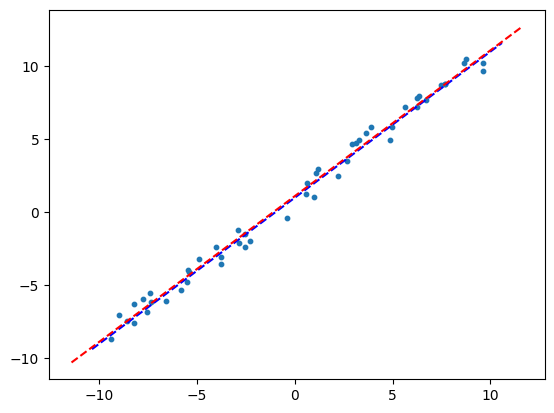

In [58]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [59]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

17.671357818628508

In [60]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1887.6263890958091

What about the test data set?

In [61]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

19.6711147436844

In [62]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

18.51817037342039

In [63]:
# Running the experiments
lambdas = [0, 0.001, 0.1, 1, 100, 1000]
avg_mses = five_fold_cv(np.array(X), np.array(Y), lambdas)

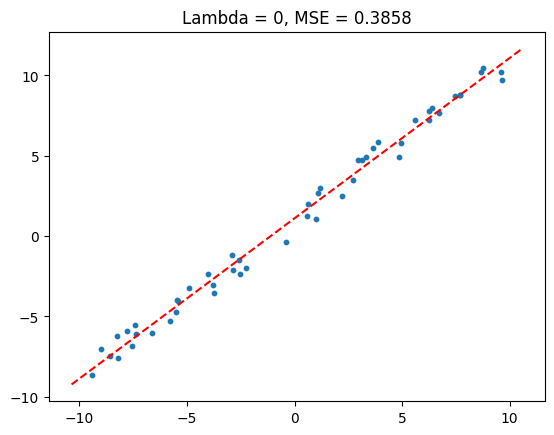

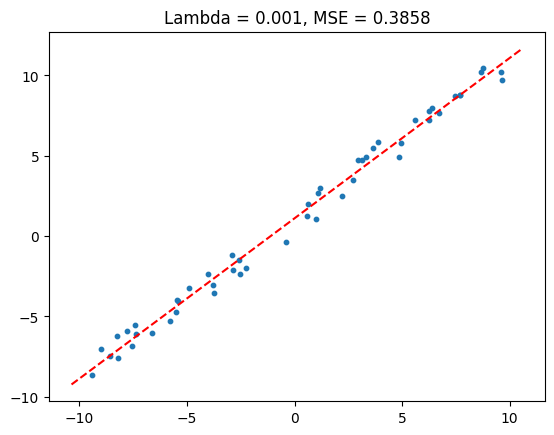

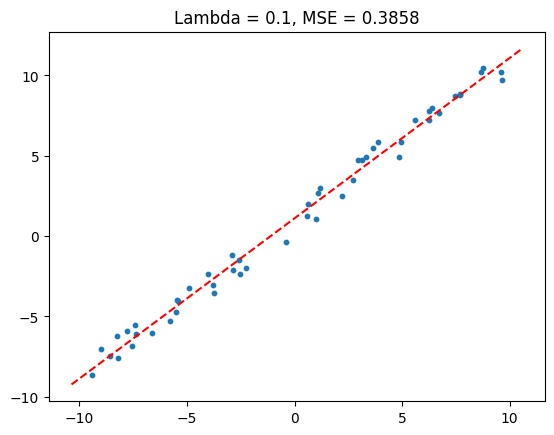

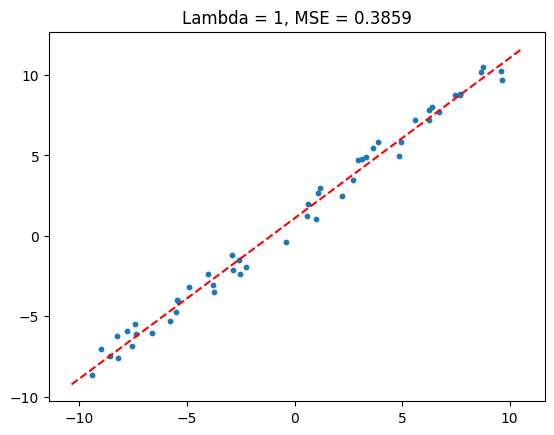

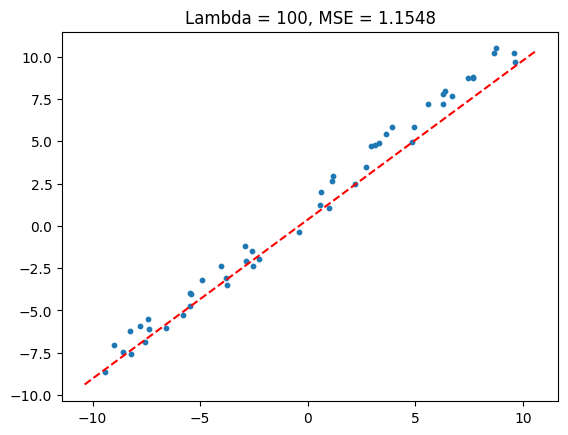

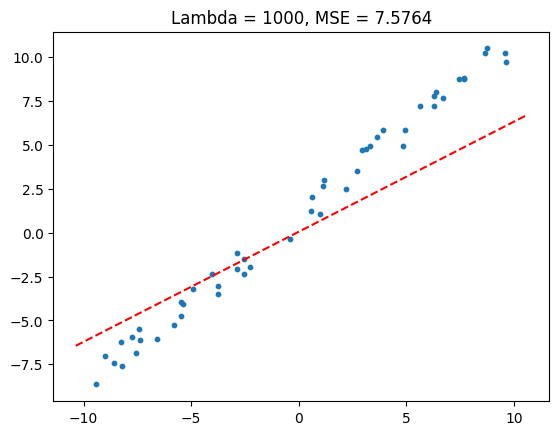

In [64]:
# Plotting the dataset and the final hypothesis for each lambda
for lambd, avg_mse in zip(lambdas, avg_mses):
    w = regularized_linear_regression(np.array(X), np.array(Y), lambd)
    plt.scatter(X1, Y, s=10)
    abline(w[1], w[0], color='r')
    plt.title(f"Lambda = {lambd}, MSE = {avg_mse:.4f}")
    plt.show()

From the above observation, I can say that as the Lambda value increases error increases which means that performance of the model decreases. It may not be same for everyone but I can say both are inversely proportional. While running it several times by changing data size & noise, I got best performance model at lambda = 0.1 but in most of the scenarios, it's similiar for lambda =0, 0.001, 0.1.